Image Processing Group Assignment

Reciept text extraction


C21416022
C21372766

Description:

The aim of this project is to be able to extract the text from a reciept that has been read by the script. 
For this project to work and extract text from various different images we needed to be able to properly enhacem the iamge for the text OCR to be able to read the text on the image. This process behind this is to create a way to a way to preformed different image porcessing enhancemnt techniquyes to imporve the quality of the image. 

First Approach
When we first started this project we had come up with the idea of prefroming the following techniques, imporve image darkness, improve image brighness, improve sharpning, reduce noise, rotate the image. Most of this methods had another method assocaiated with them so for example enhance image brighness and image darkness has a connected method that would check the best word count per image and adjust the image based on the lightness or darkness. By having a few functions quite similar to this it meant that we had code that was not properly optimzed and was very bulky. So we opted to go for the second approach which is meant for dynamically adaptive image enhacment.

Second Approach
This approach focused on making the first approah more scalabel and dynamic, what this meant is that we needed to be able to dynamically change the paramters to each image enhcamnt teqcihinue so that the image so adaptively improve itself. In our first appoach we had nine methods, compared to second solution we have five methods and better iamge enhacment techniques.



Code Overview

The following code is our second approach which is designed to process receipt images to improve Optical Character Recognition (OCR) performance using the library Tesseract. The aim of this code is to employ Python image processing and enhancement techniques to improve the quality of the images using techniques such as rotation, sharpening, brightness adjustment, noise reduction, contrast enhancement, and adaptive thresholding.


ProcessReciept class

The aim of this class is for reading the receipt image and preparing the image for image processing and initializing the parameters that will be used for enhancement.

Attributes:
Self.image - used to read the receipt image.
self.rgbImage - used to convert the original image to RGB format
self.greyImage - used to convert the original image to greyscale for better edge detection.
self.kernels - used to initialize the sharpening kernel.
self.sharpenedValues - parameters used for sharpening.
self.brightnessValues - parameters used for brightening the image.
self.imageContrastValues - parameters to improve the image contrast.
self.reduceNoiseValues - parameters used to reduce the noise in the image.
self.imageThresholdValues - used to set image Thresholding to on or off.


Function orientation()
Parameters: image.
The aim of this function is to ensure that the image is in the correct orientation so that Tesseract can read the text better in the image.

In the function it first tries to extract the metadata from the image to find the orientation of the image.

We have implemented a feature as we had experienced issues with the orientation already being in the correct orientation, so we decided to check if the angle was not 0 and if it was not zero we would rotate the image based on the angle but if the image was already 0 we would just return the image in the original format.


Function enhancemntParameters()
Parameters: imageEnhancment, OCRWordCount

The aim of this function is to iterate through all the different combinations of image enhancement parameters to see what the best combination of parameters are that give the best word count.

The first thing that this function does is call the orientation() function that corrects the orientation of the image. 

Then once it has received the corrected orientation it iterates through all the different combinations of the enhancement parameters. 

It then enhances the image based on the current iteration of combination of parameters asd and then performs OCR word count on the image.

If the combination of parameters has the best word count it then updates the combination of parameters with the new parameters.

The output of this method is the enhanced image, best iteration of parameter combination and the best word count.



Function addImageEnhanements()
Parameters: image, sharpenedValue, brightnessValue, imageContrastValue, reduceNoiseValue, imageThreshold.
The aim of this function is to make sure that the image has the following techniques present, sharpening, brightness, control, contrast control, reduce noise, image thresholding.

Sharpening - The use of sharpening is to enhance the detected edges in the image which help improve the quality of the text in the image, the image is sharpened by a predefined kernel but the middle value of the kernel is swapped out for better enhancement.

Brightness - The use of brightness control is to determine the beta value of the image to enhance the image brightness.

Contrast - The use of contrast is to ensure that the alpha parameter is set to the correct value to ensure optimum text detection

Noise reduction - The use of noise reduction is to remove any type of salt and pepper noise from the image to ensure that no noise is interfering with the text on the image.

Image Thresholding - The use of thresholding is to convert the image to a binary image so that it is easier to detect any edges or details in the image, which is a great way to detect as much text as possible.

The output of this function is the enhanced image.

Function ocr_word_count()
Parameters: image.

The aim of this function is to use Tesseract to count the words detected on the image, which is used in the enhancemntParameters() function to count the words detected for the combination of parameters.

The output of this function is the count of the words detected.

Rotation failure: (1, 'Estimating resolution as 161 Too few characters. Skipping this page Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')
Words detected 361
Detected text: PEC OEE ORE FoR Ot Re
EY Ie E cupcp wien NOW. GIVER OUP E ay Ne Bad
PROSE AY pep Got SFORS SIO E a ay ee ple Pee bok
Re Sy aye sf OzeamootO1OB” PRITAM YS Lp. oc: Tidt he Fe oe
BBs oy] ogzziooso(s, sleR EMOGER Es Pe SalEsS Ph gD.
Petes 8 OM astoonor2ens ceaNh CBN MUSIC PE Bag ae
FONE es Sef o7z9ngaoz205, slTREY SCOR, He FEBS EB eg
Rates! Sf oranaadoza0s “ SIFEY CORN A. .° S526 ad
go rf 072554002950." FLINTSTONE Po BT bie
Sek gf 08422) 008007" SUPER. XK HAMBA. OBE Peet we
eS cg (030000189478 RICE: CARES! 1 ATF EE eR,
SERS ged © tw OR ae hana agen
Foie neas | ne | | BANAHABLYERLA WO eT BAS Peed
LEP BES) ocssestizece Bun aeruss yoy: VS
PEE) VOSS TCE PORES TI47 MANE BT chee ee
ey 4023. . CRED-SEEDLESS We Desai lapreeee oe
TOES By bees GM BUSSE a Ate a

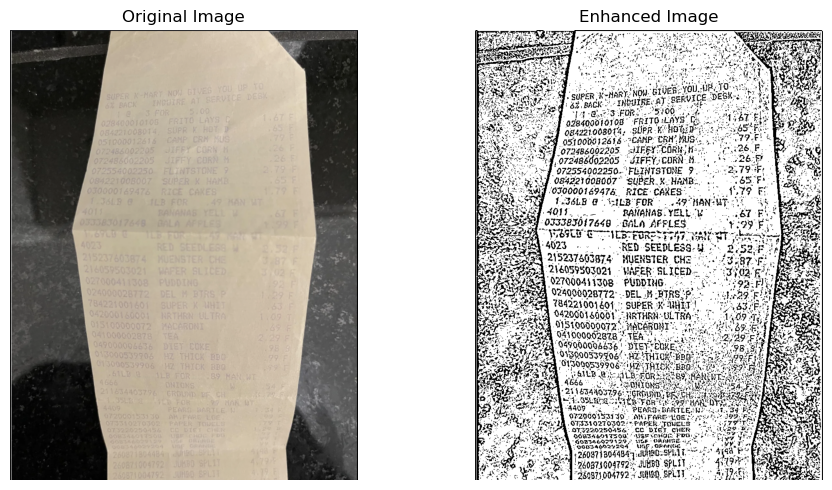

In [3]:
import imutils
import cv2
import pytesseract
from pytesseract import Output
import numpy as np
import matplotlib.pyplot as plt 


class ProcessReciept:
    def __init__(self, image):
        self.image = cv2.imread(image)
        self.rgbImage = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        self.greyImage = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        self.kernels = [
            np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        ]
        self.sharpenedValues = [0, 1, 2]
        self.brightnessValues = [0, 50, 100]
        self.imageContrastValues = [1.0, 1.5, 2.0]
        self.reduceNoiseValues = [0, 15, 30]
        self.imageThresholdValues = [True, False]

    def orientation(self, image):
        try:
            # pytesseract image rotation calculation
            results = pytesseract.image_to_osd(image, output_type=Output.DICT)

            # correction if image has already been rotated
            resultAngle = results.get("rotate", 0)

            # error prevention if rotation angle is already 0
            if resultAngle != 0:
                rotatedImage = imutils.rotate_bound(image, angle=resultAngle)
                return rotatedImage
            return image
        except pytesseract.TesseractError as e:
            # return image if rotation error
            print(f"Rotation failure: {e}")
            return image

    def enhancemntParameters(self, imageEnhancment, OCRWordCount):
        # call orientation on image to ensure valid text OCR
        correctRotation = self.orientation(self.rgbImage)

        enhancedWordCount = 0
        enhancedImage = None
        enhancedParams = {}

        # loop through each parameter for different combinations
        for sharpenedValue in self.sharpenedValues:
            for brightnessValue in self.brightnessValues:
                for imageContrastValue in self.imageContrastValues:
                    for imageThresholdValue in self.imageThresholdValues:
                        for reduceNoiseValue in self.reduceNoiseValues:

                            # now enhance the image based on each value
                            imageEnhancement = imageEnhancment(
                                cv2.cvtColor(correctRotation, cv2.COLOR_BGR2GRAY),
                                sharpenedValue,
                                brightnessValue,
                                imageContrastValue,
                                reduceNoiseValue,
                                imageThresholdValue
                            )

                            # test new parameters for word count
                            enhancedCount = OCRWordCount(imageEnhancement)

                            # if word count is better then update parameters
                            if enhancedCount > enhancedWordCount:
                                enhancedWordCount = enhancedCount
                                enhancedImage = imageEnhancement
                                enhancedParams = {
                                    sharpenedValue,
                                    brightnessValue,
                                    imageContrastValue,
                                    reduceNoiseValue,
                                    imageThresholdValue
                                }
        return enhancedImage, enhancedParams, enhancedWordCount

    def adpativeImageEnhancement(self):

        def addImageEnhanements(image, sharpenedValue, brightnessValue, imageContrastValue, reduceNoiseValue, imageThreshold):

            # make sure that the input image has three colour channels
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

            # convert to YUV colour space to enhance luminance
            yuvImage = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
            y, u, v = cv2.split(yuvImage)

            # sharpen image based on input to kernel
            if sharpenedValue > 0:
                kernel = np.array([[0, -1, 0], [-1, 5 + sharpenedValue, -1], [0, -1, 0]])
                y = cv2.filter2D(y, -1, kernel)

            # image brightness enhancement
            y = cv2.convertScaleAbs(y, alpha=imageContrastValue, beta=brightnessValue)

            # merge channels back together
            yuvEnhancedImage = cv2.merge([y, u, v])
            enhancedImage = cv2.cvtColor(yuvEnhancedImage, cv2.COLOR_YUV2BGR)

            # image noise reduction
            if reduceNoiseValue > 0:
                enhancedImage = cv2.fastNlMeansDenoising(enhancedImage, None, reduceNoiseValue, 7, 21)

            # TODO Bakht implement image thresholding
            if imageThreshold:
                greyImage = cv2.cvtColor(enhancedImage, cv2.COLOR_BGR2GRAY)
                enhancedImage = cv2.adaptiveThreshold(
                    greyImage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
                )

            return enhancedImage

        def ocr_word_count(image):

            # then use pytesseract to count the words on the image
            text = pytesseract.image_to_string(image, config="--psm 6")
            words = text.split()
            # need to return the orientated image also
            return len(words)

        # call main function to find the best parameter
        enhancedImage, enhancedParams, enhancedWordCount = self.enhancemntParameters(
            addImageEnhanements,
            ocr_word_count
        )

        # testing
        print(f"Words detected {enhancedWordCount}")
        return enhancedImage

    def exampleusage(self):
        imageEnhancement = self.adpativeImageEnhancement()
        
        text = pytesseract.image_to_string(imageEnhancement, config="--psm 6")
        
        print(f"Detected text: {text}")

        #cv2.imshow("Enhanced Image", imageEnhancement)
        #cv2.imshow("Original Image", self.image)

        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

        plt.figure(figsize=(10, 5))

        # Show the original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis("off")

        # Show the enhanced image
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(imageEnhancement, cv2.COLOR_BGR2RGB))
        plt.title("Enhanced Image")
        plt.axis("off")

        # Display the plots
        plt.tight_layout()
        plt.show()


"""Leave all below for example usage"""

reciept = ProcessReciept("/Users/jonkehoe/Documents/imagesOfRecipts/Screenshot 2024-10-23 at 16.35.57.png")
reciept.exampleusage()



Words detected 224
Detected text: SNe nore renee A BACK L eae: 2 Son
C27 PaesPREE QFPER ON BACK! DERE "25-2 me
ia “ey acne kara OOS, “hot, Eemeact

die 7 pe a ae =
prin ame ee eee ——
red Te U ber tons <=. pee
tee Aitialh poery REMIT
: sieisiie tees eo gent ot Yr 0423/2022
= iit niah Elep visas’ ey | =
Fi oa iq TAHT Sant 90400087"%,
 Grder Type: NBN Fon!) He UOT ecue ” E
am Oa gohan YY OOH” Eee
eed 3°10 po Spicy Wigvets (ded) huts” 14.67 “FEES

mead | \(3)400, Hot Hiv Dip*cupens, teh i

med! 3}AO0'NO Saucey , PUTAS - i

Sy cantonal HA Gate 15.006

1 Spey Chicken <* ESAtSe f
med! Plain le 44 reste ——
BY sbicy chicken’: | “Ftd, FES
aS Plain to ps) is! =
= jal BOF H wa hy AE —

— jie eae 7 SN, pa

Fs poten igh,» Br Nee! z

Sali Plelagr pd cit [aah Fe =

ah qaesed rats BAG,

Fer seal’ riee YOMBRU PAT USE) Pd, pete

Saf onl Fels! of: si ks Dos aa pee

Serpe seal fred. io dome #9¥n0 3an94 590.0 | pt

baad apna Ne ans Lecce ors

Fa eet ae
; ie user aby iy Asirwe altyQi09

if Miah bea oo phrase

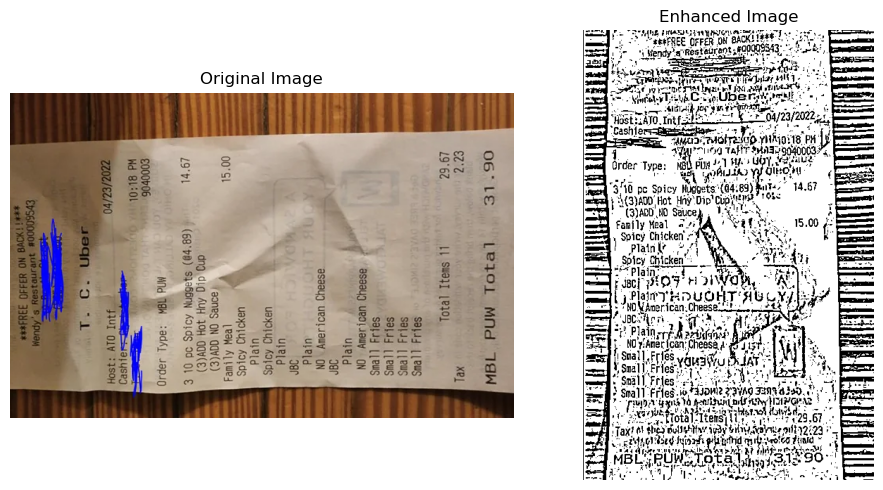

In [8]:
reciept = ProcessReciept("/Users/jonkehoe/PycharmProjects/ImageProcessingCollege/GroupAssignment/reditReciept.jpg")
reciept.exampleusage()

Words detected 406
Detected text: : SPM EXPIRES 06/04/16 we
<
s TTT eee 227
4 CLEANING SUPPLIES ORES Bee
a 003050192 UPUP HOUSEH T.""\g1°9q
ia OKT Ee
nt 29 g.99 ce R898 Be
Ay 71200113 NATAL ENER Fo %.!'95 39
my 071203088 NOTTS ERTSH F022 $150 1
eq 19273023 Cartwheel Mtrcpn <8 $0,50- Veer
Sy 073201388 NOTTS FRTSN 3 FCs7i $450 4 Ge
é 94 81,50 ca exo
Sayed $1, 71oft $6.21%='n7 AS
fag 202040116 WB octaeg Elsie 64.194 Be
210110240 OSCAR MAYERS FCHAE $2 \50" 1 Pea
4 210110375 OSCAR MAYER 2, EC =" $3.07 2 S
= Cartwheel 15% otf. $9.62! ee
211080156 NAKED intipzys7 C225 $2.50°4 Be
214124798 TOMATO sic EO cs $0-99
4 211214081 tertuce "ect griao pee
Py Dios FAC MASTERPC Fos 83.38% FANS
RA 212080427 "MARKET PANT ZFC $0.202 age
ey 212140031 +. BC SONLY:SLE-SFC 27: 81,72 Was
: {si cortwhes! 10x off $1:92'<54, Bae
GY 261011548 3s, PEPPERIINE 75 FC $2,995
g 263090045 “Sey SMUCKERS £0" FO 2 $2.09 neg ie
2e905005 AeA JENNTE-O-C2°e FC £9199 7 ay
270020350 28: LEAN CUTSIN 2 FC iz $2. 49.2 + ae
‘| {Ef Cart

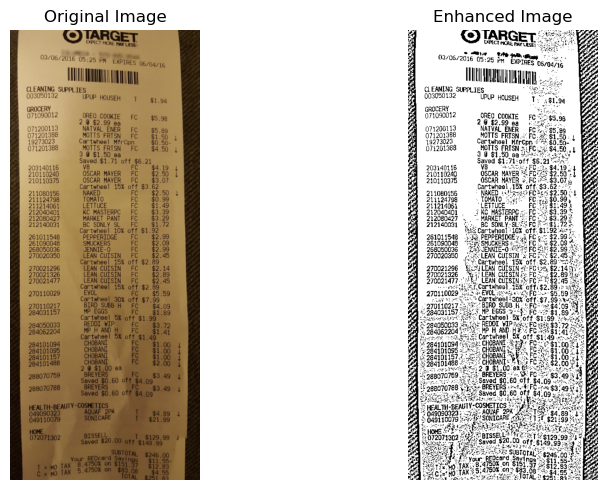

In [7]:
reciept = ProcessReciept("/Users/jonkehoe/Documents/imagesOfRecipts/Screenshot 2024-10-23 at 16.44.29.png")
reciept.exampleusage()